In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

Supplementary Table 6: SNVs targeted by assay-panels in longitudinal cohort
- contains baseline and longitudinal

In [3]:
longitudinal = pd.read_excel("41586_2017_BFnature22364_MOESM2_ESM.xlsx", sheet_name="Supplementary Table 6", header=18)
longitudinal.head()

,SampleID,Assay_Pool,Chromosome,Position,Ref,Mut,Hugo_Symbol,RefVAF,MutVAF,DOR,...,Baseline_longitudinal,PyClonePhyloCluster,PyClonePhyloClonal,ObsPyCloneClonality,ITHState,NormalMean,NormalStd,MutConf,fwd_primer,rev_primer
0,CRUK0045,11,5,15937258,G,A,FBXL7,0.999619,0.000361,49806.0,...,Longitudinal,1.0,C,C,1,0.000372,0.000109,0.393105,ACACGACGCTCTTCCGATCTGTTGGTGTGCTCGATGACGCA,AGACGTGTGCTCTTCCGATCTTGCGCTTTGTCAAACGCCA
1,CRUK0045,11,3,183994479,T,C,ECE2,0.999631,0.000290,37954.0,...,Longitudinal,1.0,C,C,1,0.000195,0.000080,0.788882,ACACGACGCTCTTCCGATCTACCTCCGCTCCATCTCTGG,AGACGTGTGCTCTTCCGATCTTAGCATCGCCTCACCATAGTCCTA
2,CRUK0045,11,15,48722904,C,T,FBN1,0.999386,0.000531,71606.0,...,Longitudinal,1.0,C,C,1,0.000497,0.000131,0.658039,ACACGACGCTCTTCCGATCTTTCTCCATCAGGTCTCCGCTGA,AGACGTGTGCTCTTCCGATCTCACATATATGTGCATCTGTGGACC
3,CRUK0045,11,10,105147056,C,T,TAF5,0.998769,0.001140,55257.0,...,Longitudinal,1.0,C,C,1,0.000644,0.000173,0.890875,ACACGACGCTCTTCCGATCTACCATTCAGGACGTCCCAGA,AGACGTGTGCTCTTCCGATCTCTACGGGCTCTGCAGACAGAA
4,CRUK0045,11,3,19384197,A,T,KCNH8,0.999648,0.000000,42554.0,...,Longitudinal,1.0,C,C,1,0.000009,0.000013,NaN,ACACGACGCTCTTCCGATCTCCTGTACACACATACCACCTACGT,AGACGTGTGCTCTTCCGATCTGGCACCTGCAAAGAAGAGAAAAG


Required columns:
- SampleID
- Chromosome
- Position
- Ref
- Mut
- Hugo_Symbol
- RefVAF    
    - (Proportion of reads that are  wild type  in the ctDNA sample)
- MutVAF    
    - (Proportion of mutant reads in the ctDNA sample)
- DOR   
    - (Depth of read achieved through next-generation sequencing of PCR amplicons)
- MutDOR    
    - (Number of mutant reads identified in ctDNA)
- DateSample
- Baseline_longitudinal







In [4]:
# keep required columns 
cols = ["SampleID", "Chromosome", "Position", "Ref", "Mut", "Hugo_Symbol", "RefVAF", "MutVAF", "DOR", "MutDOR", "DateSample", "Baseline_longitudinal"]

longitudinal = longitudinal[cols]

# keep CRUK0044
cruk0044 = longitudinal[longitudinal["SampleID"] == "CRUK0044"]
cruk0044.head()

,SampleID,Chromosome,Position,Ref,Mut,Hugo_Symbol,RefVAF,MutVAF,DOR,MutDOR,DateSample,Baseline_longitudinal
1533,CRUK0044,8,133923686,G,T,TG,0.999648,0.000015,68202.0,1.0,2015-02-27,Longitudinal
1534,CRUK0044,11,118925219,T,A,HYOU1,0.999549,0.000064,46515.0,3.0,2015-02-27,Longitudinal
1535,CRUK0044,5,150922074,G,C,FAT2,0.999656,0.000000,52253.0,0.0,2015-02-27,Longitudinal
1536,CRUK0044,1,19480386,T,A,UBR4,0.999768,0.000053,56028.0,3.0,2015-02-27,Longitudinal
1537,CRUK0044,15,50288919,T,A,ATP8B4,0.999764,0.000109,54988.0,6.0,2015-02-27,Longitudinal


In [5]:
cruk0044.to_csv("cruk0044.csv", index=False)

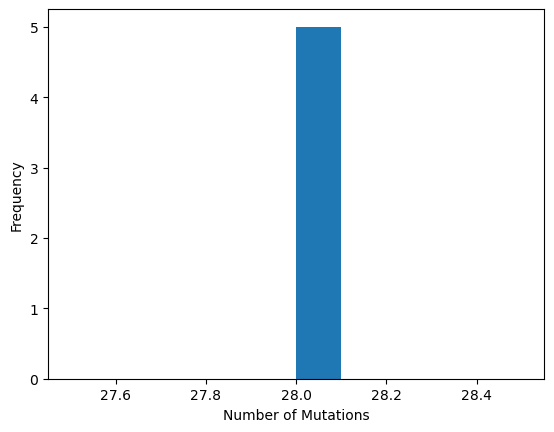

In [10]:
# for each time point, let's look at the number of mutations
num_muts = cruk0044.groupby("DateSample").size().reset_index(name="count")
# plot a histogram of the number of mutations at each time point
plt.hist(num_muts["count"])
plt.xlabel("Number of Mutations")
plt.ylabel("Frequency")
plt.show()


28 SNVs over 5 time points. 

In [5]:
# check for NA values 
longitudinal.isna().sum()

SampleID                 0
Chromosome               0
Position                 0
Ref                      0
Mut                      0
Hugo_Symbol              0
RefVAF                   5
MutVAF                   5
DOR                      2
MutDOR                   5
DateSample               0
Baseline_longitudinal    0
dtype: int64

In [6]:
# remove rows with NA values
longitudinal = longitudinal.dropna()
longitudinal.isna().sum()

SampleID                 0
Chromosome               0
Position                 0
Ref                      0
Mut                      0
Hugo_Symbol              0
RefVAF                   0
MutVAF                   0
DOR                      0
MutDOR                   0
DateSample               0
Baseline_longitudinal    0
dtype: int64

In [7]:
# check for duplicates
longitudinal.duplicated().sum()

np.int64(0)

In [8]:
# export to csv
longitudinal.to_csv("tracerx_2017_longitudinal.csv", index=False)